# Graphical User Interface programming in Python

Goal: Writing a simple Graphical User Interfaces (GUI) with PyQt based on existing widgets.

## Exercice

The exercice for this training is to create a GUI for calculating the diffraction image obtained from a 2D cristal composed on a square of NxN atoms using the Laue formula.

```python
def laue_image(ncells, h, k, oversampling):
    pass
```

The `laue_image` function calculates the diffraction image around the Bragg peak (`H`, `K`), actually (H-0.5…H+0.5, K-0.5…K+0.5) of a `ncells`x`ncells` 2D square cristal considering an `oversampling` factor.
This oversampling factor should be at least 2 to have 2 points per peak. 

The Python/numpy implementation is available here: [laue.py](laue.py)

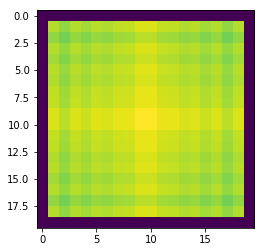

In [42]:
%matplotlib inline
from matplotlib import pyplot
from matplotlib.colors import LogNorm

import laue

result = laue.laue_image(ncells=10, h=0, k=4, oversampling=2)

pyplot.imshow(result, norm=LogNorm())

### Goal of the exercice

Write a GUI similar to this sketch to execute the Laue function and save its result :

![GUI sketch](images/sketch.png)

# Qt and PyQt overview

### Qt

[Qt](https://doc.qt.io/qt-5/index.html) is a free and open-source widget toolkit for creating graphical user interfaces.
As a victim of its own success thanks it is also used for developing cross-platform applications.

Written in c++, we are now in the 5th version, waiting for the 6th version. The first version has been released in 1995 !!!

![qt](images/qt_icon.png)


Qt is divided into several basic modules. The main modules for gui are:

* Qt Core: Provides core non-GUI functionality, like signal and slots, properties, base classes of item models, serialization, etc.
* Qt Gui: Extends QtCore with GUI functionality: Events, windows and screens, OpenGL and raster-based 2D painting, images.
* Qt Widgets: Provides ready to use Widgets for your application, including also graphical elements for your UI.

Besides those modules that you will use today, Qt is offering modules for web, sql, multimedia...

### PyQt

Due to it sucess and python sucess, bindings have been developed for Qt: PyQt5 for Qt5, PyQt4 for Qt4. Now Qt is also starting of developping is own: PySide2. But development is on going.

This permits users to access the power of Qt with the python 'abstraction'.

Due to the documentation quality of pyqt5 and Qt, we are usuelly refering to the Qt documentation.
Do not worry, most of the API is the same.

* [pyqt5 on pypi](https://pypi.org/project/PyQt5/)
* [pyqt5 official site](https://www.riverbankcomputing.com/software/pyqt/)

In [ ]:
from PyQt5 import Qt

### PySide2

The Qt company is developping is own binding ['PySide2'](https://wiki.qt.io/Qt_for_Python).

If you want to have some comparaison between the two, you can read https://machinekoder.com/pyqt-vs-qt-for-python-pyside2-pyside/

*Usually people are using wrappers like [QtPy](https://pypi.org/project/QtPy/) for using eaver PySide2 or Pyqt5.*

Information on licenses:

* PySide2 is [LGPL](https://www.gnu.org/licenses/lgpl-3.0.en.html)
* PyQt5 is [GNU GPL v3](https://www.gnu.org/licenses/gpl-3.0.en.html) (more restrivtive than the LGPL, basically all derivative works should be licensed under the terms of the GPL)



# Introduction to GUI programming

A GUI is an **interface** between a user and a computer system/program.

It provides an **interaction** between both (mutual action/reaction relation).

The computer system/program reacts upon user actions and provides feedbacks... and the other way around.

## Human factors

For this interaction to be efficent, human factors and ergonomics is key.

This is not covered in this training. We will only introduce how to program a GUI application.

Yet, you can ask yourself a few questions:

- Who are the expected users? E.g., beginners or experts, frequency of usage.
- Does the GUI provides hints on how to proceed?
  E.g., do not expect users to find a function that is only available as a keyboard shortcut.

## Event-driven programming

The GUI is waiting for user inputs to react upon (or for new information from the processing to be available).

### Polling versus events

Instead of checking if something happened on a regular basis ("polling"), a GUI program is waiting for notifications of user input or processing information.

This is based on the callback mechanism: "Don't call us, we'll call you back" (Hollywood principle).

This is the usual paradigm of GUI libraries.

### Event loop

The application execution is splitted in 2 stages:
- Initialization: Prepare the application, register callbacks to get notified.
- Execution of an event loop: Wait for events and process them in a loop.

As the chronological order of events matters, the processing of events runs in a single thread.
As a consequence, most GUI libraries are single-threaded (unless exceptions).

The event loop is handled by the GUI libraries.

### Event dispatcher

GUI libraries provides an event dispatching mechanism to hide the event loop to the developer.

A GUI is composed of reusable building bricks ("widgets") which are objects.
The GUI library is in charge of dispatching the events to the right widget or to the right event handler.

This turns the problem of handling events from a global one (a single loop for the whole application) to a local self-contained one (at the level of a single widget).

### QApplication

The `QApplication` manages GUI control flow and relationship with the OS:
* Runs the event loop and dispatcher
* Handles the relation with the OS and window system: keyboard and mouse events, settings (look&feel, string localization)
* Manages Qt objects

**Note: There is only one QApplication per application.**

Doc: https://doc.qt.io/qt-5/qapplication.html#details

In [ ]:
from PyQt5 import Qt

app = Qt.QApplication([])

# Initialization

app.exec_()  # Event loop execution
# This blocks until the application quit

#### Qt-IPython integration

There is an IPython magic command to create the QApplication and execute it from a notebook

In [ ]:
%gui qt

## A bit of software design

**1st rule**: Keep a strict separation between the processing code and the GUI.

- Why?:
  - Different concerns
  - Different knowledge
  - Testing

- How?:
  - Split the code in e.g., 2 files: `myprocessing.py` and `gui.py`

**2nd rule**: The processing code does not depend on the GUI.

- Why?:
  - Minimize dependencies and avoid circular dependencies
  - GUI usually evolves faster than the processing part
  - The processing code can be reused in a different context (batch processing, script, web...)

- How?:
  - `gui.py` has an `import myprocessing` statement
  - `myprocessing.py` does **NOT** have an `import gui` statement
  - Communication:
    - GUI -> Processing: function calls
    - Processing -> GUI: callback mechanism

# Qt mechanism and classes  TODO move

### QObject

Main Qt classes inherit from the QObject class.

**The instanciation of any QObject requires the creation of a QApplication**
This mecanism is clearly oriented Event-driven development and is central in the Qt design.
This will permits Object to react to some information (button pressed...)

This QObject class allows instances to communicate using the **signals and slots** communication.

![signal slot example](images/signal_slot_observer.png)

The creation of a connection between two QObjects is made using **connect**. You can remove the connection using **disconnect**

``` python

subject_object.signal1.connect(observer_object.slot)

...

subject_object.signal1.disconnect(observer_object.slot)

```

#### signal / slot example
To understand the interest of the signal / slot communication we can see implementation of the [observer](https://en.wikipedia.org/wiki/Observer_pattern) pattern with QObjects.

The idea is that one object 'Subject' is notifying a list of objects 'Observer' about his state.

![signal slot example](images/signal_slot_observer.png)


The 'pyqt' implementation looks like:

In [ ]:
class Observer(Qt.QObject):
    """Simple QObject, observing the state of a Subject"""
    def __init__(self, name):
        Qt.QObject.__init__(self)
        self.name = name

    def subjectObserveChangedHandler(self, state):
        print('Observer ', self.name,
            ' has been informed that subject has now state', state)


class Subject(Qt.QObject):
    """Simple QObject with a state"""
    sigStateChanged = Qt.pyqtSignal(str)

    def setState(self, state):
        print('subject state changed to', state)
        self.sigStateChanged.emit(state)


subject = Subject()
observer0 = Observer(name='observer0')
observer1 = Observer(name='observer1')

# connect subject signal with observer slots
subject.sigStateChanged.connect(observer0.subjectObserveChangedHandler)
subject.sigStateChanged.connect(observer1.subjectObserveChangedHandler)

# then change the state of the subject
subject.setState('waiting')
subject.setState('working')
print('----------------------------------------')
subject.sigStateChanged.disconnect(observer0.subjectObserveChangedHandler)
subject.sigStateChanged.disconnect(observer1.subjectObserveChangedHandler)
subject.setState('waiting')


If you want more details on 
* QObject: https://doc.qt.io/qt-5/qobject.html#details
* signal / slots: https://doc.qt.io/qt-5/signalsandslots.html
* connection type: https://doc.qt.io/qt-5/qt.html#ConnectionType-enum

# Qt widgets

Qt, among other, offers a large range of base widget to create your GUI.
The complexity is well hidden behind the QApplication and QObject.


#### hello world
If we want to create a simple label with 'hello word' text:

In [ ]:
first_widget = Qt.QLabel('hello world')
first_widget.show()

#### basic qt widgets

The QWidget class provides the basic capability to render to the screen, and to handle user input events.
Widgets are classes inheriting from [QWidget](https://doc.qt.io/qt-5/qwidget.html).

We will present shortly the most used widgets. This part as been taken from the official qt widget gallery: https://doc.qt.io/qt-5/gallery.html

The qt implementation examples (calendar and styles) using pyqt5 are availables from: https://github.com/baoboa/pyqt5/edit/master/examples/widgets


![gallery calendar](images/gallery_calendar.png)


* (1) [QGroupBox](https://doc.qt.io/qt-5/qgroupbox.html) provides a group box frame with a title.
* (2) [QCalendarWidget](https://doc.qt.io/qt-5/qcalendarwidget.html) provides a monthly calendar widget that can be used to select dates.
* (3) [QLabel](https://doc.qt.io/qt-5/qlabel.html) provides a text or image display.
* (4) [QDateEdit](https://doc.qt.io/qt-5/qdateedit.html) provides a widget for editing dates.
* (5) [QComboBox](https://doc.qt.io/qt-5/qcombobox.html) provides a combined button and pop-up list.

![gallery style](images/gallery_styles.png)

* (1)  [QCheckBox](https://doc.qt.io/qt-5/qcheckbox.html) provides a checkbox with a text label.
* (2)  [QRadioButton](https://doc.qt.io/qt-5/qradiobutton.html) provides a radio button with a text or pixmap label.
* (3)  [QPushButton](https://doc.qt.io/qt-5/qpushbutton.html) provides a command button.
* (4)  [QTabWidget](https://doc.qt.io/qt-5/qtabwidget.html) provides a stack of tabbed widgets.
* (5)  [QTableWidget](https://doc.qt.io/qt-5/qtablewidget.html) provides a classic item-based table view.
* (6)  [QScrollBar](https://doc.qt.io/qt-5/qscrollbar.html) provides a vertical or horizontal scroll bar.
* (7)  [QProgressBar](https://doc.qt.io/qt-5/qprogressbar.html) provides a horizontal progress bar.
* (8)  [QDateTimeEdit](https://doc.qt.io/qt-5/qdatetimeedit.html) provides a widget for editing dates and times.
* (9)  [QSlider](https://doc.qt.io/qt-5/qslider.html) provides a vertical or horizontal slider.
* (10) [QDial](https://doc.qt.io/qt-5/qdial.html) provides a rounded range control (like a speedometer or potentiometer).
* (11) [QLineEdit](https://doc.qt.io/qt-5/qlineedit.html) provides  a one-line text editor.


#### QWidget properties

[QWidgets](https://doc.qt.io/qt-5/qwidget.html) have several properties.
Some interesting one:
    
* visibility (hide/show/setVisible/isVisible): https://doc.qt.io/qt-5/qwidget.html#visible-prop
* toolTip: tooltip will be displayed when the mouse fly over (toolTip(), setToolTip())
* window title (windowTitle(), setWindowTitle())
* widget size (setFixedSize(), setWidth(), resize()...)
* enabled (enabled(), setEnabled())

### Exercise with QLabel

* create a QLabel and display it
* change the value and print the value using the [QLabel API](https://doc.qt.io/qt-5/qlabel.html)

In [ ]:
# create a QLabel
mylabel = ...
# set the value of the QLabel
...
# show the QLabel
...
# print the QLabel text
print()

### Exercise with QLineEdit (1)

* create a [QLineEdit](https://doc.qt.io/qt-5/qlineedit.html) and display it
* use a [QIntValidator](https://doc.qt.io/qt-5/qintvalidator.html) to insure the contain of the [QLineEdit](https://doc.qt.io/qt-5/qlineedit.html) is a **positive** int
* (optionnal) add a toolTip on the QLineEdit

In [ ]:
# QLineEdit creation
myLineEdit = ...
# defining the validator
...
# adding the validator to the QLineEdit
...
# show the QLineEdit

### Exercise with QLineEdit (2)

* define a class `IntLineEdit` which inherit from QLineEdit and create the QIntValidator in the constructor.
* the constructor should take `bottom` and `top` arguments.

In [ ]:
class IntLineEdit(Qt.QLineEdit):
    def __init__(self, parent=None):
        super(IntLineEdit, self).__init__(parent)

widget = IntLineEdit()
widget.show()

#### Dialogs

Qt is also providing a set of dialogs.
Dialogs are made for *short-term tasks and brief communications with the user*

**Dialogs can be modal (blocking) or not.**

-> If we want a modal dialog then we will call `exec_()` and wait for response. If not we will use `show()`

##### QMessageBox

To ask user question or give information you can use a [QMessageBox](https://doc.qt.io/qt-5/qmessagebox.html)

In [ ]:
msg = Qt.QMessageBox()
msg.setIcon(Qt.QMessageBox.Warning)
msg.setText("This is a warning message")
msg.setInformativeText("this message concern QMessageBox")
msg.setWindowTitle("MessageBox warning")
msg.setDetailedText("Details of the message")
msg.exec_()

We can also obtain QMessageBox instances from the [QMessageBox](https://doc.qt.io/qt-5/qmessagebox.html) static functions like 'warning' or 'information':

In [ ]:
button = Qt.QMessageBox.warning(None,
                                "MessageBox warning",
                                "This is a warning message")

##### QFileDialog

The [QFileDialog](https://doc.qt.io/qt-5/qfiledialog.html) can be used to get file(s) and or folder(s) path, existing or not.

In [ ]:
dialog = Qt.QFileDialog()
dialog.setAcceptMode(QFileDialog.AcceptOpen)
dialog.setFileMode(QFileDialog.FileMode.ExistingFiles)
dialog.setNameFilters(["py (*.py)", "ipynb (*.ipynb)", "txt (*.txt)"])

if dialog.exec_():
    print('selected files are', dialog.selectedFiles())
else:
    print('user cancel file selection')

Here again, you can get some default QFileDialog from static functions:

In [ ]:
filenames, filter_ = Qt.QFileDialog.getOpenFileNames(None, 'files to open')
print('File names:', filename)

#### other dialogs
There is other dialogs available in Qt:
    
* [QColorDialog](https://doc.qt.io/qt-5/qcolordialog.html): dialog widget for specifying colors.
* [QErrorMessage](https://doc.qt.io/qt-5/qerrormessage.html): error message display dialog.
* [QFontDialog](https://doc.qt.io/qt-5/qfontdialog.html): dialog widget for selecting a font.
* [QInputDialog](https://doc.qt.io/qt-5/qinputdialog.html): dialog to get a single value from the user.
* [QProgressDialog](https://doc.qt.io/qt-5/qprogressdialog.html): progress of an operation. 
* [QWizard](https://doc.qt.io/qt-5/qwizard.html): framework for [wizards] (several pages dialogs, see https://doc.qt.io/qt-5/qtwidgets-dialogs-trivialwizard-example.html).

#### Advanced widgets


![tree from silx view](images/silx_tree.png)


There is even more possibilities, like defining trees ([QTreeView](https://doc.qt.io/qt-5/qtreeview.html)), list ([QListWidget](https://doc.qt.io/qt-5/qlistwidget.html))...
But his part will not be covered today.


# A word on events

As said in the introduction, Qt dispatches events such as keyboard, mouse and windowing system events to the right QWidget.

QWidgets are notified of such events by calls to their event handling methods, which names end with `Event`:
- [mousePressEvent](https://doc.qt.io/qt-5/qwidget.html#mousePressEvent)
- [keyPressEvent](https://doc.qt.io/qt-5/qwidget.html#keyPressEvent)
- [resizeEvent](https://doc.qt.io/qt-5/qwidget.html#resizeEvent)
- And more, see [QWidget events doc](https://doc.qt.io/qt-5/qwidget.html#events)

In [41]:
import random

class Button(Qt.QPushButton):
    def __init__(self, parent=None):
        super(Button, self).__init__("Catch me if you can", parent)
        self.clicked.connect(self._clicked)
        
    def _clicked(self):
        print("You are smart or lucky!")

    def enterEvent(self, event):
        app = Qt.QApplication.instance()
        desktop = app.desktop()  # QDesktopWidget
        rect = desktop.availableGeometry(self)
        x = random.randint(rect.x(), rect.width() - self.width())
        y = random.randint(rect.y(), rect.height() - self.height())
        self.move(x, y)


button = Button()
button.show()

You are smart or lucky!


# Assembling widgets

How to go from single widgets to a consistent graphical user interface.

Objective: Describe and manage the geometric imbrication of widgets:

- Container widgets
- Layout

![pyMCA](images/pymca_gui.png)

## Container widgets

- [QMainWindow](https://doc.qt.io/qt-5/qmainwindow.html): Main application window


- [QSplitter](https://doc.qt.io/qt-5/qsplitter.html): Lets the user control the size of child widgets
- [QStackedWidget](https://doc.qt.io/qt-5/qstackedwidget.html): Stack of widgets where only one widget is visible at a time
- [QTabWidget](https://doc.qt.io/qt-5/qtabwidget.html): Stack of tabbed widgets
- [QGroupBox](https://doc.qt.io/qt-5/qgroupbox.html): Box frame with a title.

### QMainWindow: Main application window

![QMainWindow example](images/QMainWindow.png)

In [ ]:
class MainWindow(Qt.QMainWindow):
    def __init__(self, parent=None):
        super(MainWindow, self).__init__(parent)

        # Set central widget
        label = Qt.QTextEdit("Type text here")
        self.setCentralWidget(label)

        # Add menu
        menuBar = self.menuBar()
        fileMenu = menuBar.addMenu("File")
        editMenu = menuBar.addMenu("Edit")

        # Add a toolbar
        toolBar = self.addToolBar("Toolbar")
        toolBar.addAction(Qt.QIcon.fromTheme("edit-undo"), "Undo")
        toolBar.addAction(Qt.QIcon.fromTheme("edit-redo"), "Redo")

        # Add a dock widget
        dock = Qt.QDockWidget("Dock")
        self.addDockWidget(Qt.Qt.RightDockWidgetArea, dock)

        # Use status bar
        self.statusBar().showMessage("Current status")

window = MainWindow()
window.show()

QMainWindow Layout:
![QMainWindow layout](https://doc.qt.io/qt-5/images/mainwindowlayout.png)

Set the central widget: [QMainWindow.setCentralWidget](https://doc.qt.io/qt-5/qmainwindow.html#setCentralWidget)

Documentation: https://doc.qt.io/qt-5/qmainwindow.html

## QWidget's layout

[QWidget](https://doc.qt.io/qt-5/qwidget.html) base class can be used as a container with configurable layout (through the [QWidget.setLayout](https://doc.qt.io/qt-5/qwidget.html#setLayout) method).

The layout is responsible for automatically allocating space for each child widget of a QWidget.

Layouts are classes that inherit from [QLayout](https://doc.qt.io/qt-5/qlayout.html).

This defines a spatial tree structure of widgets.

We now have 2 different hierarchical structures: the class inheritance and the widget spatial imbrication.

### Basic layouts: Horizontal and vertical

- [QHBoxLayout](https://doc.qt.io/qt-5/qhboxlayout.html): Lines up widgets horizontally
  ![QHBoxLayout](images/QHBoxLayout.png)
- [QVBoxLayout](https://doc.qt.io/qt-5/qvboxlayout.html): Lines up widgets vertically
  ![QVBoxLayout](images/QVBoxLayout.png)
- [QBoxLayout](https://doc.qt.io/qt-5/qboxlayout.html): Lines up child widgets horizontally or vertically.
  The [setDirection](https://doc.qt.io/qt-5/qboxlayout.html#setDirection) method allows to change it.

To populate the layout, use:
- [QBoxLayout.addWidget](https://doc.qt.io/qt-5/qboxlayout.html#addWidget)(widget, stretch=0): Appends a widget to the end of the layout
- [QBoxLayout.addStrech](https://doc.qt.io/qt-5/qboxlayout.html#addStretch)(strech=0): Adds a stretchable empty space
 

#### QBoxLayout example

In [ ]:
class BoxWidget(Qt.QWidget):  # Container widget
    def __init__(self, parent=None):
        super(BoxWidget, self).__init__(parent)

        # Child widgets
        label = Qt.QLabel("Value:")
        lineEdit = Qt.QLineEdit("0")
        button = Qt.QPushButton("Done")

        # Create layout and add widgets to it
        layout = Qt.QHBoxLayout()
        # or: layout = Qt.QVBoxLayout()

        layout.addWidget(label)
        layout.addWidget(lineEdit)
        layout.addWidget(button)
        # layout.addStretch(1)  # Add a stretch area to improve resizing

        # set the widget's layout
        self.setLayout(layout)

widget = BoxWidget()
widget.show()

### Advanced layouts : Grid and stack

- [QGridLayout](https://doc.qt.io/qt-5/qgridlayout.html): lays out widgets in a grid

  To populate the layout, use the [`addWidget(widget, row, column, rowSpan, columnSpan)`](https://doc.qt.io/qt-5/qgridlayout.html#addWidget) method.
  ![](images/QGridLayout.svg)
  
- [QFormLayout](https://doc.qt.io/qt-5/qformlayout.html): lays out widgets in a 2 columns grid

  To populate the layout, use the [`addRow(label, widget)`](https://doc.qt.io/qt-5/qformlayout.html#addRow) or [`addRow(widget)`](https://doc.qt.io/qt-5/qformlayout.html#addRow-4) method.
  ![](images/QFormLayout.svg)
  
- [QStackedLayout](https://doc.qt.io/qt-5/qstackedlayout.html): stack of widgets where only one widget is visible at a time

#### QGridLayout example

In [ ]:
class GridWidget(Qt.QWidget):  # Container widget
    def __init__(self, parent=None):
        super(GridWidget, self).__init__(parent)

        # Child widgets
        label = Qt.QLabel("Range:")
        beginLineEdit = Qt.QLineEdit("0")
        endLineEdit = Qt.QLineEdit("1")
        button = Qt.QPushButton("Done")
        
        # Create layout and add widgets to it
        layout = Qt.QGridLayout()
        
        layout.addWidget(label, 0, 0)
        layout.addWidget(beginLineEdit, 0, 1)
        layout.addWidget(endLineEdit, 0, 2)
        layout.addWidget(button, 1, 0, 1, 3)
        
        # set the widget's layout
        self.setLayout(layout)

widget = GridWidget()
widget.show()

#### QFormLayout example

In [ ]:
# Alternative: inherit from QWidget
class FormWidget(Qt.QWidget):
    def __init__(self, parent=None):
        super(FormWidget, self).__init__(parent)
        beginLineEdit = Qt.QLineEdit("0", parent=widget)
        endLineEdit = Qt.QLineEdit("1", parent=widget)
        button = Qt.QPushButton("Done", parent=widget)

        # Create layout and add widgets to it
        layout = Qt.QFormLayout(parent=self)  # Give the parent is same as setLayout

        layout.addRow("Min:", beginLineEdit)
        layout.addRow("Max:", endLineEdit)
        layout.addRow(button)

widget = FormWidget()
widget.show()

### Nested layout

For complex widget imbrication, you can use a hierarchy of widgets, each having a different layout.

It is also possible to nest layouts within each other (e.g., with [QBoxLayout.addLayout](https://doc.qt.io/qt-5/qboxlayout.html#addLayout)).

In [ ]:
class NestedBoxLayoutWidget(Qt.QWidget):
    def __init__(self, parent=None):
        super(NestedBoxLayoutWidget, self).__init__(parent)
        label = Qt.QLabel("Range:")
        beginLineEdit = Qt.QLineEdit("0")
        endLineEdit = Qt.QLineEdit("1")
        button = Qt.QPushButton("Done")

        # Create layout and add widgets to it
        layout = Qt.QVBoxLayout(self)

        layout.addWidget(label)

        # Adding a nested horizontal layout
        horizontalLayout = Qt.QHBoxLayout()
        layout.addLayout(horizontalLayout)

        horizontalLayout.addWidget(beginLineEdit)
        horizontalLayout.addWidget(endLineEdit)

        layout.addWidget(button)
        layout.addStretch(1)

widget = NestedBoxLayoutWidget()
widget.show()

### Layout processus

Each widget advertises:
- some spatial request: [sizeHint](https://doc.qt.io/qt-5/qwidget.html#sizeHint-prop), [minimumSizeHint](https://doc.qt.io/qt-5/qwidget.html#minimumSizeHint-prop), [minimumSize](https://doc.qt.io/qt-5/qwidget.html#minimumSize-prop),
[maximumSize](https://doc.qt.io/qt-5/qwidget.html#maximumSize-prop)
- how it accepts to be resized: [sizePolicy](https://doc.qt.io/qt-5/qwidget.html#sizePolicy-prop)

The layout manager takes this information into account to allocate a rectangle to each child widget.

Documentation on layout: https://doc.qt.io/qt-5/layout.html


## Exercice

### Layout

Write a form widget which allows the user to provide parameters for the calculation of the diffraction image obtained from a 2D square cristal using the Laue formula.
The Python/numpy implementation is available here: [laue.py](laue.py)

Sketch of the GUI:
![GUI sketch](images/sketch.png)

Hint: You can create such a form with a QWidget with a QFormLayout, QLineEdit widgets (and eventually QLabels) and a QPushButton.

### Retrieve parameters

Add a `compute` method that retrieves parameters from the different widgets and prints the result of the`laue_image` function.

### Connect button signal

Connect the `compute` method to the `clicked` QPushButton signal (see [QAbstractButton signals](https://doc.qt.io/qt-5/qabstractbutton.html#signals)) to run the computation when the user clicks on the button.

### Add a file dialog

Replace the printing of the result by saving to a file:
- Use one of the [QFileDialog static methods](https://doc.qt.io/qt-5/qfiledialog.html#static-public-members) to ask the user for a filename.
- Use [numpy.save](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) to save the result to a file.

# PyQt pitfalls

### QWidget parent

When a QWidget **A** is added to another QWidget **B** or to its layout, **B** becomes automatically the parent of **A**.

To get the current QWidget parent, use the [QObject.parent](https://doc.qt.io/qt-5/qobject.html#parent) method.


In [ ]:
label = Qt.QLabel("Text")  # Create a label
print("label's parent:", label.parent())

In [ ]:
# Add the label to a QWidget
window = Qt.QMainWindow()
window.setCentralWidget(label)
print("label's parent:", label.parent())
label.parent() is window

### (Py)Qt object instance destruction

With Qt, the object parenting used for layout also handles the life-cycle (i.e., automatic destruction) of widget instances.

When a widget is destroyed, all its children are also destroyed...

With PyQt, this raises an issue as Python is also handling the life-cycle of instances (with reference counting).

In [ ]:
label.text()

In [ ]:
del window
print("label:", label)
label.text()

### (Py)Qt object instance destruction

A QWidget is a C++ Qt object.
To be accessible from Python, it is wrapped in a Python object by PyQt.

- The destruction of the Python PyQt object instance is handled by Python.
- The destruction of the C++ Qt object instance is handled by:
  - **Python** if its `parent` is `None`.
  - **Qt** if its `parent` is **not** `None`.

## Unhandled exceptions

With PyQt5 >= 5.5, an unhandled exception in Python terminates the application (see [doc](https://www.riverbankcomputing.com/static/Docs/PyQt5/incompatibilities.html#unhandled-python-exceptions)).

It is possible to override this behavior by setting Python's [sys.excepthook](https://docs.python.org/3/library/sys.html#sys.excepthook).


In [ ]:
import sys, traceback
from PyQt5 import Qt

def excepthook(type_, value, tb):
    message = '%s, %s, %s' % (type_, value, ''.join(traceback.format_tb(tb)))
    print('message')
    Qt.QMessageBox.critical(None, "Exception raised", message)

def clicked():
    raise RuntimeError("Button clicked")
    
app = Qt.QApplication([])
sys.excepthook = excepthook

button = Qt.QPushButton('Press here')
button.clicked.connect(clicked)
button.show()
app.exec_()

## Final hands on

Create a GUI for the Laue simulation.

### step 1: create the LaueFormWidget

Might look like:

* an input for the number of unit cells
* an input for oversampling
* an input for H
* an input for K
* a run button which call the laue_image with the input defined previously


### step 2 add one or several of the following add-on (the one interest you the most)

#### 2.1 Add validators in the QLineEdit

For now you can give any input value in the QLineEdit.
You should add `QIntValidator` to restrict the possible entries:

* number of cells should be 1 or higher
* number of oversampling should be 1 or higher
* H should be 0 or higher
* K should be 0 or higher

note: you can create a dedicated widget `IntLineEdit` which deal with the `QIntValidator` to avoid code duplication.


#### 2.2 Using a QMainWindow

Make the LaueFormWidget inherit from [QMainWindow](https://doc.qt.io/qt-5/qmainwindow.html) instead of QWidget

#### 2.3 save the result into a .npy

You can rename the run button run and save or create a new button 'save'.
For saving you should ask the user the output file using a QFileDialog.
Use the [numpy save function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) to dump the data into a file.

#### 2.4 display output size

Add a Qlabel which update automatically when the output size change (when number of unit cells or oversampling values changed)


#### 2.5 add advancement status

Add information concerning process advancement into the QMainWindow [statusBar](https://doc.qt.io/qt-5/qmainwindow.html#statusBar)
This require to have accomplish 2.2 first


#### 2.6 add a result preview

Add a QLabel to display the result once computed.
You can use the `gray_log` function from colormap to get the QPixmap

#### 2.7 execute 'laue' process into a Thread

This will avoid GUI freeze that you might have enconter.

#### 2.8 Add tooltips

Add tooltips on the different QLineEdit and button to give extra information.

# QtDesigner


[QtCreator](https://doc.qt.io/qtcreator/) is an integrated development environment (IDE) for creating cross platform applications using Qt.

[QtDesigner](https://doc.qt.io/qt-5/qtdesigner-manual.html) is a one of the tool embed in QtCreator for building GUIs.
From this tool you can compose Qwindows, QWidgets or QDialogs for example and embed it with some python script.


![QtDesigner](images/designer-multiple-screenshot.png)

## demonstration: doing the Laue exercice with QtCreator

launch *qtcreator* application

``` bash
qtcreator
```

![QtCreator start](images/qt_creator_start.png)


Then go for the new project, application => QtWidgetsApplication


Give a path and name to your project.

![QtCreator start](images/qt_creator_new_project.png)

We are only focusing on the .ui file, since you are not supposed to be C++ developer and we want a python application.
Signals / slot connections will be managed in python script, not in c++.

Now you can add your widget and subwidgets. **Name all your widget** for recovering them later.

Once created, select your widgets and add a layout.

As we want to create a python application, we only focus on the widget and layout,

![QtDesigner tree](images/qt_designer_project_tree.png)

Now save your project, you will be able to modify it afterwards.

### Link .ui file with python script

On the web you will find several tutorial to convert directly the `.ui` files to `.py` files like

``` bash
python -m PyQt5.uic.pyuic -x [FILENAME].ui -o [FILENAME].py
```

In this case, beware not to modify the generated code: See [How-to use the generated code](https://www.riverbankcomputing.com/static/Docs/PyQt5/designer.html#using-the-generated-code)

It is best if you use the [uic](https://www.riverbankcomputing.com/static/Docs/PyQt5/designer.html#the-uic-module) module from PyQt5.

This way you won't need to convert it each time you modify the `.ui` and you can embed the widget connections in the same python file.

In [ ]:
from PyQt5 import uic
help(uic.loadUi)

### Loading .ui

Example: [laue_widget.ui](examples/laue_widget.ui)

In [40]:
from PyQt5 import Qt, uic

class LaueMainWindow(Qt.QMainWindow):
    def __init__(self, *args, **kwargs):
        super(LaueMainWindow, self).__init__(*args, **kwargs)
        uic.loadUi(uifile="examples/laue_widget.ui", baseinstance=self)

window = LaueMainWindow()
window.setAttribute(Qt.Qt.WA_DeleteOnClose)
window.show()

In [ ]:
print("ncells:", window._nCellsSpinBox.text(), "oversampling:", window._oversamplingSpinBox.value(),
      "H:", window._hLineEdit.text(), "K:", window._kLineEdit.text())

### Using inherited widgets in Qt designer

It is possible to use widgets that are not part of Qt (like `IntLineEdit`) in the designer, through **widget promotion**:

- In the designer, use the base Qt widget as a placeholder
- Configure this base widget to be replaced by the target onde: widget context menu->**Promote to...**
- In the dialog, give the target widget name and the Python module it belongs to as the header file.

# Conclusion

PyQt as most GUI library is:
- single-threaded
- event-driven
- object oriented

It provides reusable building bricks (widgets and layout) to compose GUI.

Its functionalities and the level of control is huge, and so is its API.

The designer is an efficient way to build (and maintain) GUIs.

You can find more exercices here: https://pythonspot.com/gui/

## Final remark

Compare the code you've written during the exercice to the following cell which provides the same functionality:

In [ ]:
import numpy
import laue

numpy.save("result.npy", laue.laue_image(ncells=10, h=0, k=4, oversampling=2))